Here we are creating a model to predict the next digit

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 

In [25]:
# Data preprocessing
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [26]:
data[0:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [27]:
target[0:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [28]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)
data.shape,target.shape

((100, 5, 1), (100,))

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [42]:
#RNN Model
model = Sequential()

model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
# here 1 means the output size, we want only 1 output
# batch_input_shape describes the input shape of our data
# None if we do not know the input size
# 5 represents the numbers of input sequence given when prediction is made
# 1 represents the length of each vector
# return sequence = True will return output after every node
# setting it to False will return only one output at the last node

model.add(LSTM((1),return_sequences=False))

In [43]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 1)              12        
                                                                 
 lstm_6 (LSTM)               (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test))

Epoch 1/400
3/3 [==============================] - 3s 332ms/step - loss: 0.5500 - accuracy: 0.0000e+00 - val_loss: 0.6318 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5461 - accuracy: 0.0000e+00 - val_loss: 0.6278 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5423 - accuracy: 0.0000e+00 - val_loss: 0.6239 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.0000e+00 - val_loss: 0.6201 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5350 - accuracy: 0.0000e+00 - val_loss: 0.6164 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 14ms/step - loss: 0.5314 - accuracy: 0.0000e+00 - val_loss: 0.6128 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 15ms/step - loss: 0.5281 - accuracy: 0.0000e+00 - val_los

In [46]:
results = model.predict(x_test)

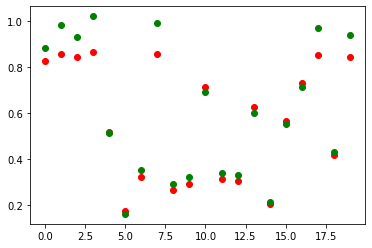

In [47]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

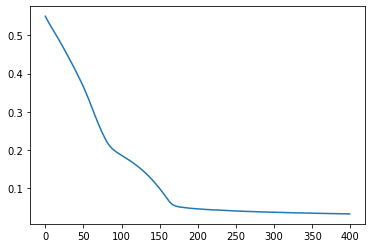

In [48]:
plt.plot(history.history['loss'])
plt.show()

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

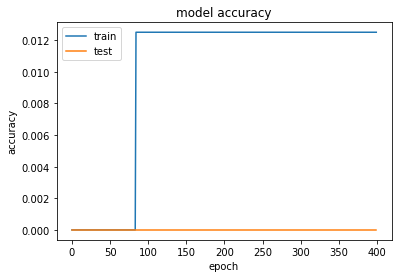

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

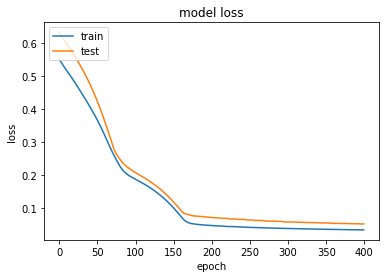

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()